In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("laptop_data.csv")
df.sample(5)

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
685,685,Dell,Gaming,15.6,Full HD 1920x1080,Intel Core i7 7820HK 2.9GHz,16GB,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1070,Windows 10,3.49kg,149916.60
74,74,Acer,Notebook,14.0,1366x768,Intel Core i3 6006U 2GHz,8GB,1TB HDD,Intel HD Graphics 520,Windows 10,2.1kg,20725.92
1160,1160,Lenovo,Ultrabook,14.0,Full HD 1920x1080,Intel Core i7 6600U 2.6GHz,8GB,256GB SSD,Intel HD Graphics 520,Windows 7,1.7kg,79866.72
594,594,Lenovo,Notebook,17.3,Full HD 1920x1080,Intel Core i3 6006U 2GHz,4GB,500GB HDD,Intel HD Graphics 520,No OS,2.8kg,28185.12
464,464,Lenovo,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7820HQ 2.9GHz,8GB,256GB SSD,Nvidia Quadro M2200M,Windows 10,2.67kg,111355.20


## Data Check
* checking shape of data
* checking holes in data
* checking the description of data
* checking data type of data

In [3]:
df.shape

(1303, 12)

In [4]:
df.isnull().sum()

Unnamed: 0          0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [5]:
df.duplicated().sum()

0

In [6]:
df.dtypes

Unnamed: 0            int64
Company              object
TypeName             object
Inches              float64
ScreenResolution     object
Cpu                  object
Ram                  object
Memory               object
Gpu                  object
OpSys                object
Weight               object
Price               float64
dtype: object

In [7]:
df.describe()

,Unnamed: 0,Inches,Price
count,1303.00000,1303.000000,1303.000000
mean,651.00000,15.017191,59870.042910
std,376.28801,1.426304,37243.201786
min,0.00000,10.100000,9270.720000
25%,325.50000,14.000000,31914.720000
50%,651.00000,15.600000,52054.560000
75%,976.50000,15.600000,79274.246400
max,1302.00000,18.400000,324954.720000


In [8]:
df=df.drop("Unnamed: 0",axis=1)  ##removing uncessary column

#### splitting the necessary keywords in data

In [9]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [10]:
df['Ram']=df["Ram"].str.replace('GB',"")
df['Weight']=df["Weight"].str.replace("kg","")


In [11]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080


In [12]:
df['Cpu'].value_counts()

Cpu
Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core M M3-6Y30 0.9GHz        1
AMD A9-Series 9420 2.9GHz          1
Intel Core i3 6006U 2.2GHz         1
AMD A6-Series 7310 2GHz            1
Intel Xeon E3-1535M v6 3.1GHz      1
Name: count, Length: 118, dtype: int64

In [13]:
## we need parsing here in cpu context as it's very important here and going to effect our prices

In [14]:
def parse_cpu_column(df, cpu_column='cpu'):
    """
    Parse CPU column to extract basic features.
    
    Parameters:
    df: DataFrame containing the CPU column
    cpu_column: name of the CPU column (default: 'cpu')
    
    Returns:
    DataFrame with additional parsed CPU features
    """
    
    def extract_cpu_features(cpu_string):
        """Extract features from a single CPU string"""
        
        features = {
            'cpu_company': None,
            'cpu_line': None,
            'cpu_generation': None,
            'cpu_type_suffix': None,
            'cpu_clock_speed': None
        }
        
        if pd.isna(cpu_string):
            return features
        
        cpu_string = str(cpu_string)
        
        # 1. Extract Company (Brand)
        if 'Intel' in cpu_string:
            features['cpu_company'] = 'Intel'
        elif 'AMD' in cpu_string:
            features['cpu_company'] = 'AMD'
        elif 'Samsung' in cpu_string:
            features['cpu_company'] = 'Samsung'
        else:
            features['cpu_company'] = 'Other'
        
        # 2. Extract Processor Line (i3, i5, i7, i9, Ryzen, etc.)
        # For Intel
        intel_line_pattern = r'(Core i\d|Xeon|Pentium|Celeron|Atom|Core M)'
        intel_match = re.search(intel_line_pattern, cpu_string, re.IGNORECASE)
        
        if intel_match:
            features['cpu_line'] = intel_match.group(1)
        
        # For AMD
        amd_ryzen_pattern = r'Ryzen\s*(\d)'
        amd_a_pattern = r'A(\d+)-Series'
        
        ryzen_match = re.search(amd_ryzen_pattern, cpu_string, re.IGNORECASE)
        a_match = re.search(amd_a_pattern, cpu_string, re.IGNORECASE)
        
        if ryzen_match:
            features['cpu_line'] = f'Ryzen {ryzen_match.group(1)}'
        elif a_match:
            features['cpu_line'] = f'A{a_match.group(1)}-Series'
        elif 'E-Series' in cpu_string or 'E2' in cpu_string:
            features['cpu_line'] = 'E-Series'
        
        # 3. Extract Generation (first digit of model number for Intel)
        gen_pattern = r'(\d)(\d{3})'  # Matches like 7200, 8550, etc.
        gen_match = re.search(gen_pattern, cpu_string)
        
        if gen_match:
            features['cpu_generation'] = int(gen_match.group(1))
        
        # 4. Extract Processor Type Suffix (U, H, HQ, HK, etc.)
        suffix_pattern = r'\d{3,4}([A-Z]{1,2})\b'
        suffix_match = re.search(suffix_pattern, cpu_string)
        
        if suffix_match:
            features['cpu_type_suffix'] = suffix_match.group(1)
        
        # 5. Extract Clock Speed (GHz)
        speed_pattern = r'(\d+\.?\d*)\s*GHz'
        speed_match = re.search(speed_pattern, cpu_string)
        
        if speed_match:
            features['cpu_clock_speed'] = float(speed_match.group(1))
        
        return features
    
    # Apply parsing to each row
    parsed_features = df[cpu_column].apply(extract_cpu_features)
    
    # Convert to DataFrame
    parsed_df = pd.DataFrame(parsed_features.tolist())
    
    # Combine with original dataframe
    result_df = pd.concat([df, parsed_df], axis=1)
    
    return result_df

In [15]:
import re
# Instead of inplace=True, reassign the dataframe
df = df.rename(columns={'Cpu': 'cpu'})

# Then parse
parsed_df = parse_cpu_column(df)

# Check the new columns
print(parsed_df.columns)

# View the parsed results
print(parsed_df[['cpu', 'cpu_company', 'cpu_line', 'cpu_generation', 'cpu_type_suffix', 'cpu_clock_speed']].head(10))


Index(['Company', 'TypeName', 'Inches', 'ScreenResolution', 'cpu', 'Ram',
       'Memory', 'Gpu', 'OpSys', 'Weight', 'Price', 'cpu_company', 'cpu_line',
       'cpu_generation', 'cpu_type_suffix', 'cpu_clock_speed'],
      dtype='object')
                          cpu cpu_company   cpu_line  cpu_generation  \
0        Intel Core i5 2.3GHz       Intel    Core i5             NaN   
1        Intel Core i5 1.8GHz       Intel    Core i5             NaN   
2  Intel Core i5 7200U 2.5GHz       Intel    Core i5             7.0   
3        Intel Core i7 2.7GHz       Intel    Core i7             NaN   
4        Intel Core i5 3.1GHz       Intel    Core i5             NaN   
5     AMD A9-Series 9420 3GHz         AMD  A9-Series             9.0   
6        Intel Core i7 2.2GHz       Intel    Core i7             NaN   
7        Intel Core i5 1.8GHz       Intel    Core i5             NaN   
8  Intel Core i7 8550U 1.8GHz       Intel    Core i7             8.0   
9  Intel Core i5 8250U 1.6GHz       Intel

In [16]:
parsed_df.head()

,Company,TypeName,Inches,ScreenResolution,cpu,Ram,Memory,Gpu,OpSys,Weight,Price,cpu_company,cpu_line,cpu_generation,cpu_type_suffix,cpu_clock_speed
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,Intel,Core i5,NaN,None,2.3
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,Intel,Core i5,NaN,None,1.8
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,Intel,Core i5,7.0,U,2.5
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,Intel,Core i7,NaN,None,2.7
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,Intel,Core i5,NaN,None,3.1


In [17]:
parsed_df=parsed_df.drop('cpu',axis=1)
parsed_df.head()

,Company,TypeName,Inches,ScreenResolution,Ram,Memory,Gpu,OpSys,Weight,Price,cpu_company,cpu_line,cpu_generation,cpu_type_suffix,cpu_clock_speed
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,Intel,Core i5,NaN,None,2.3
1,Apple,Ultrabook,13.3,1440x900,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,Intel,Core i5,NaN,None,1.8
2,HP,Notebook,15.6,Full HD 1920x1080,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,Intel,Core i5,7.0,U,2.5
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,Intel,Core i7,NaN,None,2.7
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,Intel,Core i5,NaN,None,3.1


In [18]:
df=parsed_df

In [19]:
df['Memory'].value_counts()

Memory
256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD         

In [20]:
df['Memory'] = df['Memory'].astype(str).replace('\.0', '', regex=True)
df["Memory"] = df["Memory"].str.replace('GB', '')
df["Memory"] = df["Memory"].str.replace('TB', '000')
new = df["Memory"].str.split("+", n = 1, expand = True)
df["first"]= new[0]
df["first"]=df["first"].str.strip()
df["second"]= new[1]

df["Layer1HDD"] = df["first"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer1SSD"] = df["first"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer1Hybrid"] = df["first"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer1Flash_Storage"] = df["first"].apply(lambda x: 1 if "Flash Storage" in x else 0)
df['first'] = df['first'].str.replace(r'\D', '', regex=True)

# Replace inplace=True with assignment
df["second"] = df["second"].fillna("0")

df["Layer2HDD"] = df["second"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer2SSD"] = df["second"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer2Hybrid"] = df["second"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer2Flash_Storage"] = df["second"].apply(lambda x: 1 if "Flash Storage" in x else 0)
df['second'] = df['second'].str.replace(r'\D', '', regex=True)

df["first"] = df["first"].astype(int)
df["second"] = df["second"].astype(int)

df["HDD"]=(df["first"]*df["Layer1HDD"]+df["second"]*df["Layer2HDD"])
df["SSD"]=(df["first"]*df["Layer1SSD"]+df["second"]*df["Layer2SSD"])
df["Hybrid"]=(df["first"]*df["Layer1Hybrid"]+df["second"]*df["Layer2Hybrid"])
df["Flash_Storage"]=(df["first"]*df["Layer1Flash_Storage"]+df["second"]*df["Layer2Flash_Storage"])

# Replace inplace=True with assignment
df = df.drop(columns=['first', 'second', 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid',
       'Layer1Flash_Storage', 'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid',
       'Layer2Flash_Storage'])

<>:1: SyntaxWarning: invalid escape sequence '\.'
<>:1: SyntaxWarning: invalid escape sequence '\.'
C:\Users\AAYUSH KUMAR\AppData\Local\Temp\ipykernel_2616\4130216223.py:1: SyntaxWarning: invalid escape sequence '\.'
  df['Memory'] = df['Memory'].astype(str).replace('\.0', '', regex=True)


In [21]:
df=df.drop('Memory',axis=1)
df.head()

,Company,TypeName,Inches,ScreenResolution,Ram,Gpu,OpSys,Weight,Price,cpu_company,cpu_line,cpu_generation,cpu_type_suffix,cpu_clock_speed,HDD,SSD,Hybrid,Flash_Storage
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,Intel,Core i5,NaN,None,2.3,0,128,0,0
1,Apple,Ultrabook,13.3,1440x900,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,Intel,Core i5,NaN,None,1.8,0,0,0,128
2,HP,Notebook,15.6,Full HD 1920x1080,8,Intel HD Graphics 620,No OS,1.86,30636.0000,Intel,Core i5,7.0,U,2.5,0,256,0,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,Intel,Core i7,NaN,None,2.7,0,512,0,0
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,Intel,Core i5,NaN,None,3.1,0,256,0,0


In [22]:
df['ScreenResolution'].value_counts()

ScreenResolution
Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x14

In [23]:
## parsing resolution

In [24]:
def parse_screen_resolution(df, screen_column='ScreenResolution'):
    """
    Parse ScreenResolution column to extract meaningful features.
    
    Parameters:
    df: DataFrame containing the ScreenResolution column
    screen_column: name of the screen resolution column
    
    Returns:
    DataFrame with additional parsed screen features
    """
    
    def extract_screen_features(screen_string):
        """Extract features from a single screen resolution string"""
        
        features = {
            'resolution_type': None,
            'ips_panel': 0,
            'touchscreen': 0,
            'retina_display': 0,
            'resolution_width': None,
            'resolution_height': None
        }
        
        if pd.isna(screen_string):
            return features
        
        screen_string = str(screen_string)
        
        # 1. Check for IPS Panel
        if 'IPS Panel' in screen_string:
            features['ips_panel'] = 1
        
        # 2. Check for Touchscreen
        if 'Touchscreen' in screen_string:
            features['touchscreen'] = 1
        
        # 3. Check for Retina Display
        if 'Retina Display' in screen_string:
            features['retina_display'] = 1
        
        # 4. Extract Resolution Type (HD, Full HD, 4K, Quad HD+, etc.)
        if '4K Ultra HD' in screen_string:
            features['resolution_type'] = '4K Ultra HD'
        elif 'Quad HD+' in screen_string:
            features['resolution_type'] = 'Quad HD+'
        elif 'Full HD' in screen_string:
            features['resolution_type'] = 'Full HD'
        elif 'Quad HD' in screen_string:  # This should come after Quad HD+
            features['resolution_type'] = 'Quad HD'
        else:
            # If no specific type mentioned, it's likely standard HD or lower
            features['resolution_type'] = 'Standard'
        
        # 5. Extract Resolution Width and Height (e.g., 1920x1080)
        resolution_pattern = r'(\d{3,4})x(\d{3,4})'
        resolution_match = re.search(resolution_pattern, screen_string)
        
        if resolution_match:
            features['resolution_width'] = int(resolution_match.group(1))
            features['resolution_height'] = int(resolution_match.group(2))
        
        return features
    
    # Apply parsing to each row
    parsed_features = df[screen_column].apply(extract_screen_features)
    
    # Convert to DataFrame
    parsed_df = pd.DataFrame(parsed_features.tolist())
    
    # Combine with original dataframe
    result_df = pd.concat([df, parsed_df], axis=1)
    
    return result_df

In [25]:
df = parse_screen_resolution(df, screen_column='ScreenResolution')

In [26]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Ram,Gpu,OpSys,Weight,Price,cpu_company,...,HDD,SSD,Hybrid,Flash_Storage,resolution_type,ips_panel,touchscreen,retina_display,resolution_width,resolution_height
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,Intel,...,0,128,0,0,Standard,1,0,1,2560,1600
1,Apple,Ultrabook,13.3,1440x900,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,Intel,...,0,0,0,128,Standard,0,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,8,Intel HD Graphics 620,No OS,1.86,30636.0000,Intel,...,0,256,0,0,Full HD,0,0,0,1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,Intel,...,0,512,0,0,Standard,1,0,1,2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,Intel,...,0,256,0,0,Standard,1,0,1,2560,1600


In [27]:
df=df.drop('ScreenResolution',axis=1)
df.head()

,Company,TypeName,Inches,Ram,Gpu,OpSys,Weight,Price,cpu_company,cpu_line,...,HDD,SSD,Hybrid,Flash_Storage,resolution_type,ips_panel,touchscreen,retina_display,resolution_width,resolution_height
0,Apple,Ultrabook,13.3,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,Intel,Core i5,...,0,128,0,0,Standard,1,0,1,2560,1600
1,Apple,Ultrabook,13.3,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,Intel,Core i5,...,0,0,0,128,Standard,0,0,0,1440,900
2,HP,Notebook,15.6,8,Intel HD Graphics 620,No OS,1.86,30636.0000,Intel,Core i5,...,0,256,0,0,Full HD,0,0,0,1920,1080
3,Apple,Ultrabook,15.4,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,Intel,Core i7,...,0,512,0,0,Standard,1,0,1,2880,1800
4,Apple,Ultrabook,13.3,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,Intel,Core i5,...,0,256,0,0,Standard,1,0,1,2560,1600


In [28]:
df['Gpu'].value_counts()

Gpu
Intel HD Graphics 620      281
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
AMD Radeon 540               1
ARM Mali T860 MP4            1
Name: count, Length: 110, dtype: int64

In [29]:
## parsing gpu

In [30]:
def parse_gpu_column(df, gpu_column='Gpu'):
    """
    Parse GPU column to extract meaningful features.
    
    Parameters:
    df: DataFrame containing the GPU column
    gpu_column: name of the GPU column
    
    Returns:
    DataFrame with additional parsed GPU features
    """
    
    def extract_gpu_features(gpu_string):
        """Extract features from a single GPU string"""
        
        features = {
            'gpu_company': None,
            'gpu_series': None,
            'gpu_model': None
        }
        
        if pd.isna(gpu_string):
            return features
        
        gpu_string = str(gpu_string)
        
        # 1. Extract GPU Company
        if 'Intel' in gpu_string:
            features['gpu_company'] = 'Intel'
        elif 'Nvidia' in gpu_string or 'GeForce' in gpu_string:
            features['gpu_company'] = 'Nvidia'
        elif 'AMD' in gpu_string or 'Radeon' in gpu_string:
            features['gpu_company'] = 'AMD'
        elif 'ARM' in gpu_string:
            features['gpu_company'] = 'ARM'
        else:
            features['gpu_company'] = 'Other'
        
        # 2. Extract GPU Series for Intel
        if features['gpu_company'] == 'Intel':
            if 'UHD Graphics' in gpu_string:
                features['gpu_series'] = 'UHD Graphics'
            elif 'HD Graphics' in gpu_string:
                features['gpu_series'] = 'HD Graphics'
            elif 'Iris' in gpu_string:
                if 'Iris Plus' in gpu_string:
                    features['gpu_series'] = 'Iris Plus'
                elif 'Iris Pro' in gpu_string:
                    features['gpu_series'] = 'Iris Pro'
                else:
                    features['gpu_series'] = 'Iris'
        
        # 3. Extract GPU Series for Nvidia
        elif features['gpu_company'] == 'Nvidia':
            if 'GTX' in gpu_string:
                # Check for specific GTX series
                if 'GTX 10' in gpu_string:
                    features['gpu_series'] = 'GTX 10 Series'
                elif 'GTX 9' in gpu_string:
                    features['gpu_series'] = 'GTX 9 Series'
                elif 'GTX 8' in gpu_string:
                    features['gpu_series'] = 'GTX 8 Series'
                elif 'GTX 7' in gpu_string:
                    features['gpu_series'] = 'GTX 7 Series'
                else:
                    features['gpu_series'] = 'GTX'
            elif 'RTX' in gpu_string:
                features['gpu_series'] = 'RTX'
            elif 'MX' in gpu_string:
                features['gpu_series'] = 'MX'
            elif 'Quadro' in gpu_string:
                features['gpu_series'] = 'Quadro'
            else:
                features['gpu_series'] = 'GeForce'
        
        # 4. Extract GPU Series for AMD
        elif features['gpu_company'] == 'AMD':
            if 'Radeon Pro' in gpu_string:
                features['gpu_series'] = 'Radeon Pro'
            elif 'Radeon RX' in gpu_string:
                features['gpu_series'] = 'Radeon RX'
            elif 'Radeon R7' in gpu_string:
                features['gpu_series'] = 'Radeon R7'
            elif 'Radeon R5' in gpu_string:
                features['gpu_series'] = 'Radeon R5'
            elif 'Radeon' in gpu_string:
                features['gpu_series'] = 'Radeon'
            elif 'FirePro' in gpu_string:
                features['gpu_series'] = 'FirePro'
        
        # 5. Extract GPU Series for ARM
        elif features['gpu_company'] == 'ARM':
            if 'Mali' in gpu_string:
                features['gpu_series'] = 'Mali'
        
        # 6. Extract GPU Model Number (e.g., 1050, 620, 940MX)
        model_pattern = r'(\d{3,4}[A-Z]{0,3})'
        model_match = re.search(model_pattern, gpu_string)
        
        if model_match:
            features['gpu_model'] = model_match.group(1)
        
        return features
    
    # Apply parsing to each row
    parsed_features = df[gpu_column].apply(extract_gpu_features)
    
    # Convert to DataFrame
    parsed_df = pd.DataFrame(parsed_features.tolist())
    
    # Combine with original dataframe
    result_df = pd.concat([df, parsed_df], axis=1)
    
    return result_df

In [31]:
df = parse_gpu_column(df, gpu_column='Gpu')
df.head()

,Company,TypeName,Inches,Ram,Gpu,OpSys,Weight,Price,cpu_company,cpu_line,...,Flash_Storage,resolution_type,ips_panel,touchscreen,retina_display,resolution_width,resolution_height,gpu_company,gpu_series,gpu_model
0,Apple,Ultrabook,13.3,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,Intel,Core i5,...,0,Standard,1,0,1,2560,1600,Intel,Iris Plus,640
1,Apple,Ultrabook,13.3,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,Intel,Core i5,...,128,Standard,0,0,0,1440,900,Intel,HD Graphics,6000
2,HP,Notebook,15.6,8,Intel HD Graphics 620,No OS,1.86,30636.0000,Intel,Core i5,...,0,Full HD,0,0,0,1920,1080,Intel,HD Graphics,620
3,Apple,Ultrabook,15.4,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,Intel,Core i7,...,0,Standard,1,0,1,2880,1800,AMD,Radeon Pro,455
4,Apple,Ultrabook,13.3,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,Intel,Core i5,...,0,Standard,1,0,1,2560,1600,Intel,Iris Plus,650


In [32]:
df=df.drop('Gpu',axis=1)
df.head()

,Company,TypeName,Inches,Ram,OpSys,Weight,Price,cpu_company,cpu_line,cpu_generation,...,Flash_Storage,resolution_type,ips_panel,touchscreen,retina_display,resolution_width,resolution_height,gpu_company,gpu_series,gpu_model
0,Apple,Ultrabook,13.3,8,macOS,1.37,71378.6832,Intel,Core i5,NaN,...,0,Standard,1,0,1,2560,1600,Intel,Iris Plus,640
1,Apple,Ultrabook,13.3,8,macOS,1.34,47895.5232,Intel,Core i5,NaN,...,128,Standard,0,0,0,1440,900,Intel,HD Graphics,6000
2,HP,Notebook,15.6,8,No OS,1.86,30636.0000,Intel,Core i5,7.0,...,0,Full HD,0,0,0,1920,1080,Intel,HD Graphics,620
3,Apple,Ultrabook,15.4,16,macOS,1.83,135195.3360,Intel,Core i7,NaN,...,0,Standard,1,0,1,2880,1800,AMD,Radeon Pro,455
4,Apple,Ultrabook,13.3,8,macOS,1.37,96095.8080,Intel,Core i5,NaN,...,0,Standard,1,0,1,2560,1600,Intel,Iris Plus,650


In [33]:
df['TypeName'].value_counts()

TypeName
Notebook              727
Gaming                205
Ultrabook             196
2 in 1 Convertible    121
Workstation            29
Netbook                25
Name: count, dtype: int64

In [34]:
## now we do univaraiate analysis and bivariate analysis

## Univariate Analysis

<Axes: xlabel='Price', ylabel='Count'>

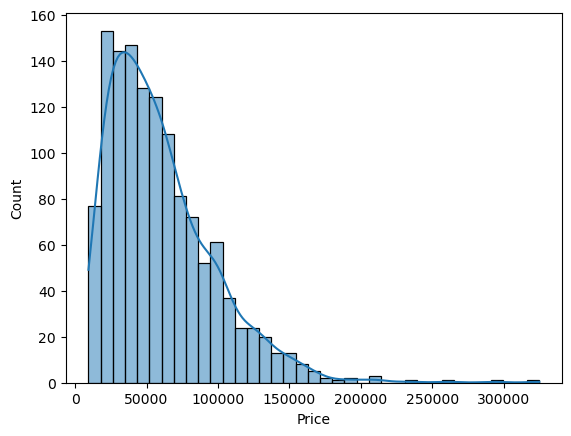

In [35]:
# analysis the price distribution
sns.histplot(df['Price'],kde=True)

C:\Users\AAYUSH KUMAR\AppData\Local\Temp\ipykernel_2616\3544787414.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


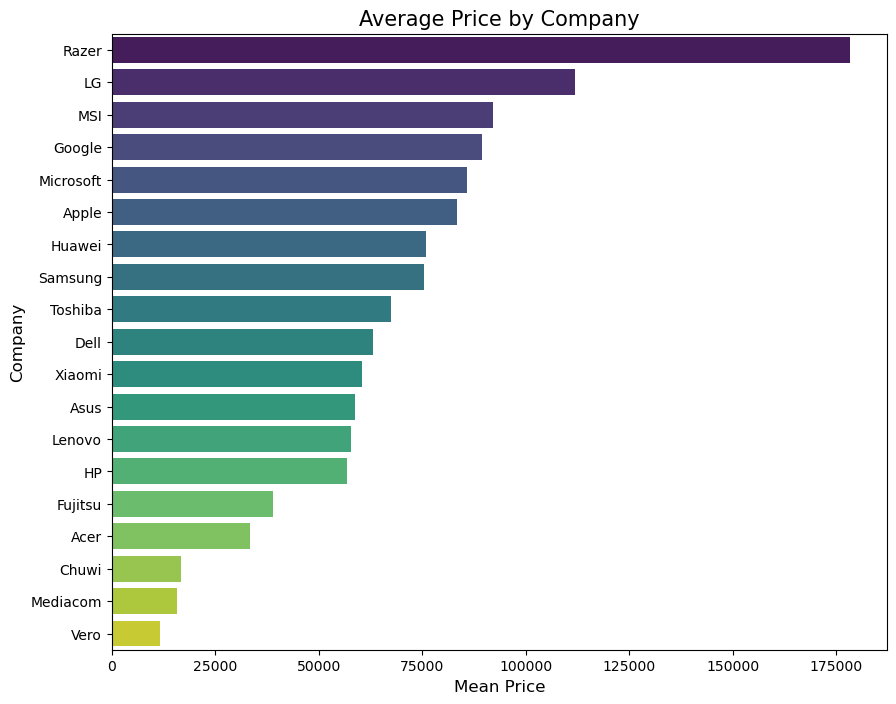

In [36]:
plt.figure(figsize=(10,8))

order = df.groupby('Company')['Price'].mean().sort_values(ascending=False).index
sns.barplot(
    data=df, 
    x='Price', 
    y='Company', 
    order=order, 
    palette='viridis',
    errorbar=None
)
plt.title('Average Price by Company', fontsize=15)
plt.xlabel('Mean Price', fontsize=12)
plt.ylabel('Company', fontsize=12)


plt.show()

<Axes: xlabel='Company'>

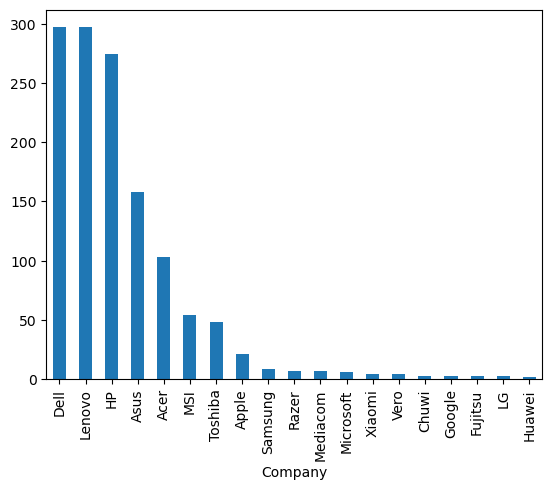

In [37]:
df['Company'].value_counts().plot(kind='bar')

<Axes: xlabel='TypeName'>

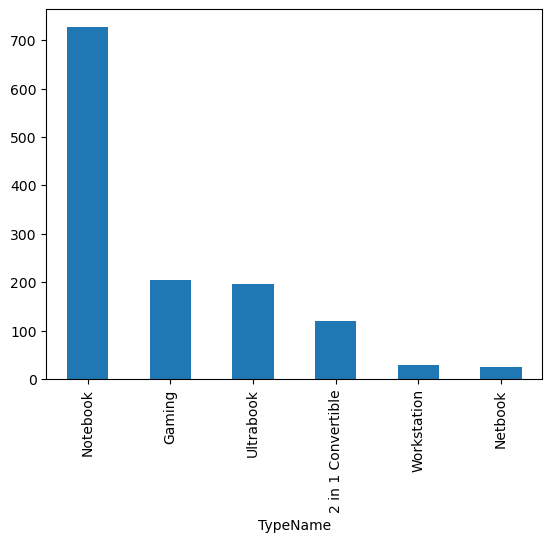

In [38]:
df['TypeName'].value_counts().plot(kind='bar')

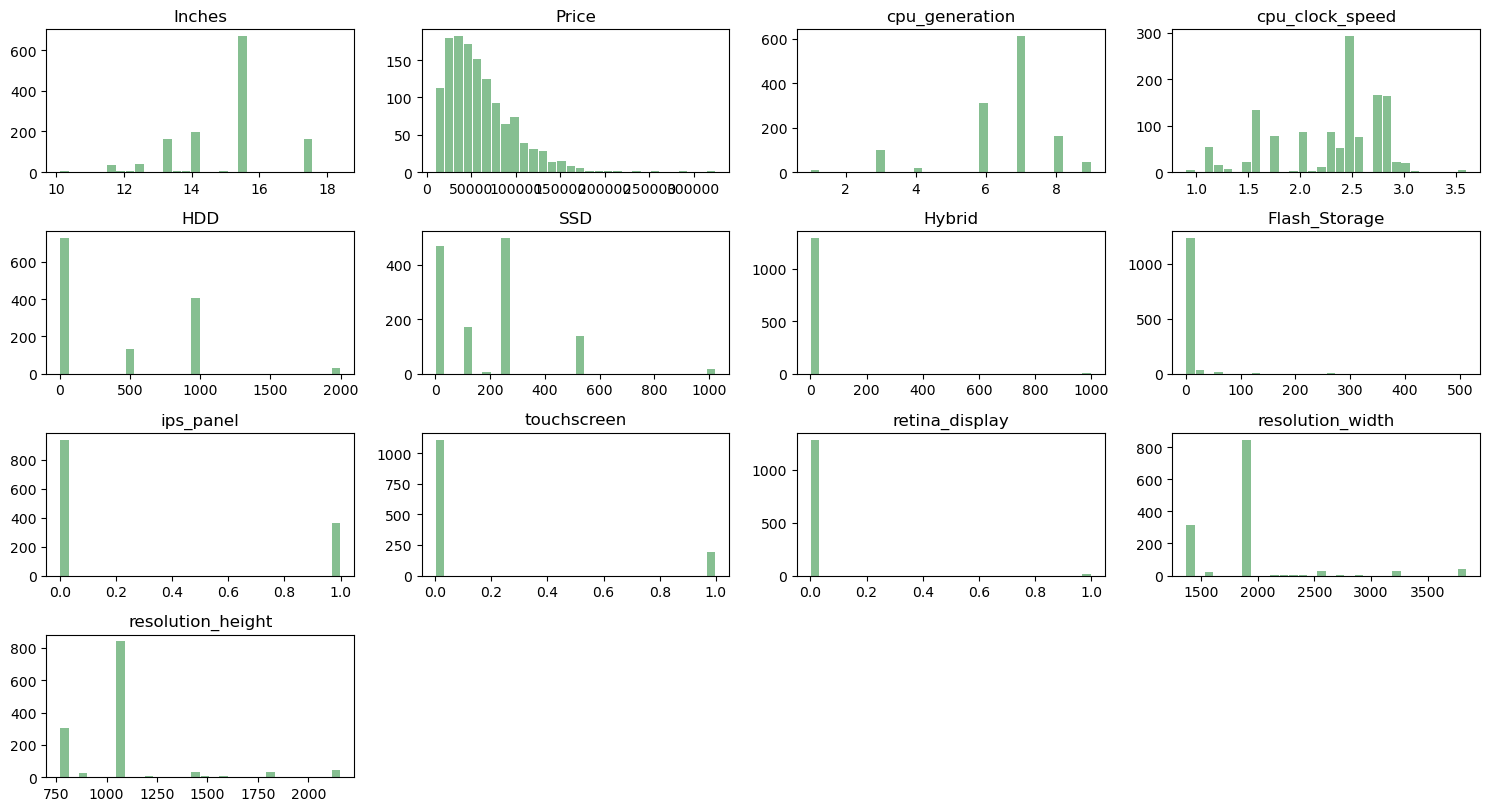

In [39]:
df.hist(
    bins=30,             
    figsize=(15, 10),    
    grid=False,          
    color='#86bf91',            
    zorder=2,            # Ensures bars are drawn over grid lines
    rwidth=0.9,
    layout=(5, 4),
    sharex=False         
)
plt.tight_layout()  # Fixes the overlap automatically
plt.show()

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Company            1303 non-null   object 
 1   TypeName           1303 non-null   object 
 2   Inches             1303 non-null   float64
 3   Ram                1303 non-null   object 
 4   OpSys              1303 non-null   object 
 5   Weight             1303 non-null   object 
 6   Price              1303 non-null   float64
 7   cpu_company        1303 non-null   object 
 8   cpu_line           1300 non-null   object 
 9   cpu_generation     1257 non-null   float64
 10  cpu_type_suffix    1089 non-null   object 
 11  cpu_clock_speed    1303 non-null   float64
 12  HDD                1303 non-null   int64  
 13  SSD                1303 non-null   int64  
 14  Hybrid             1303 non-null   int64  
 15  Flash_Storage      1303 non-null   int64  
 16  resolution_type    1303 

In [41]:
df.head()

,Company,TypeName,Inches,Ram,OpSys,Weight,Price,cpu_company,cpu_line,cpu_generation,...,Flash_Storage,resolution_type,ips_panel,touchscreen,retina_display,resolution_width,resolution_height,gpu_company,gpu_series,gpu_model
0,Apple,Ultrabook,13.3,8,macOS,1.37,71378.6832,Intel,Core i5,NaN,...,0,Standard,1,0,1,2560,1600,Intel,Iris Plus,640
1,Apple,Ultrabook,13.3,8,macOS,1.34,47895.5232,Intel,Core i5,NaN,...,128,Standard,0,0,0,1440,900,Intel,HD Graphics,6000
2,HP,Notebook,15.6,8,No OS,1.86,30636.0000,Intel,Core i5,7.0,...,0,Full HD,0,0,0,1920,1080,Intel,HD Graphics,620
3,Apple,Ultrabook,15.4,16,macOS,1.83,135195.3360,Intel,Core i7,NaN,...,0,Standard,1,0,1,2880,1800,AMD,Radeon Pro,455
4,Apple,Ultrabook,13.3,8,macOS,1.37,96095.8080,Intel,Core i5,NaN,...,0,Standard,1,0,1,2560,1600,Intel,Iris Plus,650


In [42]:
## converting to int64
df=df.astype({
    
    'Weight':'float64',
    'Ram':'int64'
    
})


In [43]:
df['cpu_generation'].isna().sum()

46

In [44]:
from sklearn.preprocessing import LabelEncoder

# Fill NaN values - use assignment, not inplace
df['cpu_generation'] = df['cpu_generation'].fillna(df['cpu_generation'].mode()[0])
df['cpu_line'] = df['cpu_line'].fillna('Unknown')
df['cpu_type_suffix'] = df['cpu_type_suffix'].fillna('Unknown')
df['resolution_type'] = df['resolution_type'].fillna('Standard')

# Label Encoding for ordinal features
cpu_line_mapping = {
    'Core i3': 3, 'Core i5': 5, 'Core i7': 7, 'Core i9': 9,
    'Ryzen 3': 3, 'Ryzen 5': 5, 'Ryzen 7': 7, 'Ryzen 9': 9,
    'Pentium': 2, 'Celeron': 1, 'Xeon': 8, 'Core M': 4,
    'A4-Series': 1.5, 'A6-Series': 2, 'A8-Series': 2.5, 
    'A9-Series': 3, 'A10-Series': 3.5, 'A12-Series': 4, 
    'E-Series': 1, 'Unknown': 3
}
df['cpu_line'] = df['cpu_line'].map(cpu_line_mapping)

cpu_type_mapping = {'HK': 6, 'HQ': 5, 'H': 4, 'HS': 3, 'U': 2, 'Y': 1, 'M': 2, 'T': 2, 'Unknown': 2}
df['cpu_type_suffix'] = df['cpu_type_suffix'].map(cpu_type_mapping)

resolution_mapping = {'Standard': 1, 'Full HD': 2, 'Quad HD': 3, 'Quad HD+': 4, '4K Ultra HD': 5}
df['resolution_type'] = df['resolution_type'].map(resolution_mapping)

# Encode gpu_model
le = LabelEncoder()
if 'gpu_model' in df.columns:
    df['gpu_model'] = le.fit_transform(df['gpu_model'].astype(str))



# One-Hot encode only columns that exist
cols_to_encode = []
for col in ['Company', 'TypeName', 'OpSys', 'cpu_company', 'gpu_company', 'gpu_series']:
    if col in df.columns:
        cols_to_encode.append(col)



if cols_to_encode:
    df = pd.get_dummies(df, columns=cols_to_encode, drop_first=True)

print("Encoding complete!")
print(df.shape)

Encoding complete!
(1303, 72)


In [45]:
df.head()

,Inches,Ram,Weight,Price,cpu_line,cpu_generation,cpu_type_suffix,cpu_clock_speed,HDD,SSD,...,gpu_series_Iris Pro,gpu_series_MX,gpu_series_Mali,gpu_series_Quadro,gpu_series_Radeon,gpu_series_Radeon Pro,gpu_series_Radeon R5,gpu_series_Radeon R7,gpu_series_Radeon RX,gpu_series_UHD Graphics
0,13.3,8,1.37,71378.6832,5.0,7.0,2.0,2.3,0,128,...,False,False,False,False,False,False,False,False,False,False
1,13.3,8,1.34,47895.5232,5.0,7.0,2.0,1.8,0,0,...,False,False,False,False,False,False,False,False,False,False
2,15.6,8,1.86,30636.0000,5.0,7.0,2.0,2.5,0,256,...,False,False,False,False,False,False,False,False,False,False
3,15.4,16,1.83,135195.3360,7.0,7.0,2.0,2.7,0,512,...,False,False,False,False,False,True,False,False,False,False
4,13.3,8,1.37,96095.8080,5.0,7.0,2.0,3.1,0,256,...,False,False,False,False,False,False,False,False,False,False


In [46]:

correlation=df.corr()['Price']
print(correlation)
pd.reset_option('display.max_rows')

Inches                     0.068197
Ram                        0.743007
Weight                     0.210370
Price                      1.000000
cpu_line                   0.650802
                             ...   
gpu_series_Radeon Pro      0.102308
gpu_series_Radeon R5      -0.159244
gpu_series_Radeon R7      -0.066890
gpu_series_Radeon RX       0.018963
gpu_series_UHD Graphics    0.027564
Name: Price, Length: 72, dtype: float64


In [47]:
weak_features = []
for name, value in correlation.items():
    if -0.1 < value < 0.1 and name != 'Price':
        weak_features.append(name)


print(weak_features)

['Inches', 'HDD', 'Hybrid', 'Flash_Storage', 'retina_display', 'Company_Apple', 'Company_Asus', 'Company_Chuwi', 'Company_Dell', 'Company_Fujitsu', 'Company_Google', 'Company_HP', 'Company_Huawei', 'Company_LG', 'Company_Lenovo', 'Company_Mediacom', 'Company_Microsoft', 'Company_Samsung', 'Company_Toshiba', 'Company_Vero', 'Company_Xiaomi', 'TypeName_Netbook', 'OpSys_Mac OS X', 'OpSys_Windows 10 S', 'OpSys_macOS', 'cpu_company_Samsung', 'gpu_company_ARM', 'gpu_series_GTX', 'gpu_series_GTX 9 Series', 'gpu_series_GeForce', 'gpu_series_Iris', 'gpu_series_Iris Plus', 'gpu_series_Iris Pro', 'gpu_series_MX', 'gpu_series_Mali', 'gpu_series_Radeon R7', 'gpu_series_Radeon RX', 'gpu_series_UHD Graphics']


In [48]:
df.drop(columns=weak_features)

,Ram,Weight,Price,cpu_line,cpu_generation,cpu_type_suffix,cpu_clock_speed,SSD,resolution_type,ips_panel,...,OpSys_Windows 7,cpu_company_Intel,gpu_company_Intel,gpu_company_Nvidia,gpu_series_GTX 10 Series,gpu_series_HD Graphics,gpu_series_Quadro,gpu_series_Radeon,gpu_series_Radeon Pro,gpu_series_Radeon R5
0,8,1.37,71378.6832,5.0,7.0,2.0,2.3,128,1,1,...,False,True,True,False,False,False,False,False,False,False
1,8,1.34,47895.5232,5.0,7.0,2.0,1.8,0,1,0,...,False,True,True,False,False,True,False,False,False,False
2,8,1.86,30636.0000,5.0,7.0,2.0,2.5,256,2,0,...,False,True,True,False,False,True,False,False,False,False
3,16,1.83,135195.3360,7.0,7.0,2.0,2.7,512,1,1,...,False,True,False,False,False,False,False,False,True,False
4,8,1.37,96095.8080,5.0,7.0,2.0,3.1,256,1,1,...,False,True,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,4,1.80,33992.6400,7.0,6.0,2.0,2.5,128,2,1,...,False,True,True,False,False,True,False,False,False,False
1299,16,1.30,79866.7200,7.0,6.0,2.0,2.5,512,4,1,...,False,True,True,False,False,True,False,False,False,False
1300,2,1.50,12201.1200,1.0,3.0,2.0,1.6,0,1,0,...,False,True,True,False,False,True,False,False,False,False
1301,6,2.19,40705.9200,7.0,6.0,2.0,2.5,0,1,0,...,False,True,False,False,False,False,False,False,False,True


<Axes: >

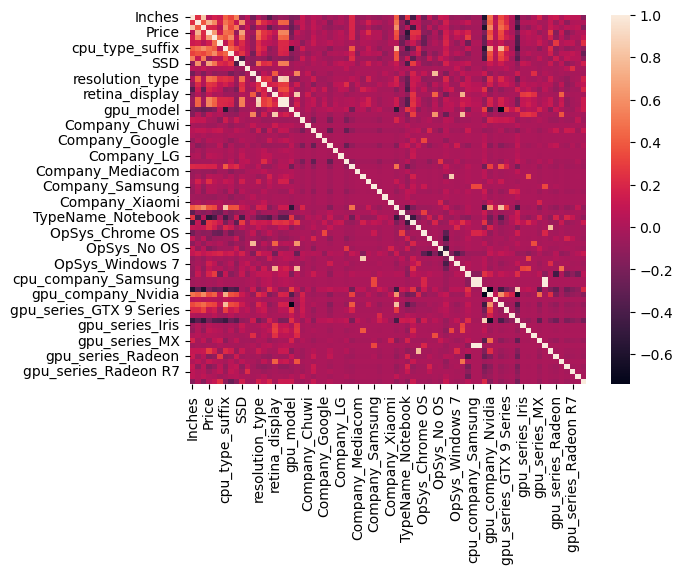

In [49]:
sns.heatmap(df.corr())

In [50]:
## splitting data in test, train split
from sklearn.model_selection import train_test_split

X=df.drop('Price',axis=1)
y=df['Price']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=42)

In [51]:
# Check for NaN values
print("NaN values in each column:")
print(X_train.isna().sum()[X_train.isna().sum() > 0])

# Fill all NaN values
X_train = X_train.fillna(X_train.median())
X_test = X_test.fillna(X_test.median())

# Verify no NaN left
print(f"\nTotal NaN in X_train: {X_train.isna().sum().sum()}")
print(f"Total NaN in X_test: {X_test.isna().sum().sum()}")

# Also check y_train and y_test
print(f"NaN in y_train: {y_train.isna().sum()}")
print(f"NaN in y_test: {y_test.isna().sum()}")

# If y has NaN, drop those rows
if y_train.isna().sum() > 0:
    mask = ~y_train.isna()
    X_train = X_train[mask]
    y_train = y_train[mask]

if y_test.isna().sum() > 0:
    mask = ~y_test.isna()
    X_test = X_test[mask]
    y_test = y_test[mask]

print(f"\nFinal shapes:")
print(f"X_train: {X_train.shape}")
print(f"X_test: {X_test.shape}")

NaN values in each column:
cpu_line           16
cpu_type_suffix    11
dtype: int64

Total NaN in X_train: 0
Total NaN in X_test: 0
NaN in y_train: 0
NaN in y_test: 0

Final shapes:
X_train: (1042, 71)
X_test: (261, 71)


In [52]:
## Feature scaling 
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)



In [53]:
print(f"Training set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")
print(f"Total samples: {len(X)}")

Training set size: (1042, 71)
Test set size: (261, 71)
Total samples: 1303


In [56]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# Dictionary to store models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42, n_estimators=100),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42)
}

# Train and evaluate each model
results = {}

for name, model in models.items():
    # Train the model
    model.fit(X_train_scaled, y_train)
    
    # Predictions
    y_train_pred = model.predict(X_train_scaled)
    y_test_pred = model.predict(X_test_scaled)
    
    # Calculate metrics
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    mae = mean_absolute_error(y_test, y_test_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    
    results[name] = {
        'Train R²': train_r2,
        'Test R²': test_r2,
        'MAE': mae,
        'RMSE': rmse
    }
    
    print(f"\n{name}:")
    print(f"  Train R²: {train_r2:.4f}")
    print(f"  Test R²: {test_r2:.4f}")
    print(f"  MAE: INR {mae:.2f}")
    print(f"  RMSE: INR {rmse:.2f}")

# Find best model
best_model = max(results, key=lambda x: results[x]['Test R²'])
print(f"\n🏆 Best Model: {best_model} with Test R² = {results[best_model]['Test R²']:.4f}")


Linear Regression:
  Train R²: 0.8243
  Test R²: 0.8011
  MAE: INR 11736.32
  RMSE: INR 16934.14

Ridge:
  Train R²: 0.8239
  Test R²: 0.8019
  MAE: INR 11665.38
  RMSE: INR 16901.30

Lasso:
  Train R²: 0.8242
  Test R²: 0.8017
  MAE: INR 11692.58
  RMSE: INR 16910.81

Decision Tree:
  Train R²: 0.9995
  Test R²: 0.7670
  MAE: INR 11435.55
  RMSE: INR 18328.31


D:\Users\AAYUSH KUMAR\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.030e+11, tolerance: 1.429e+08
  model = cd_fast.enet_coordinate_descent(



Random Forest:
  Train R²: 0.9777
  Test R²: 0.8420
  MAE: INR 9093.47
  RMSE: INR 15093.96

Gradient Boosting:
  Train R²: 0.9173
  Test R²: 0.8654
  MAE: INR 8665.23
  RMSE: INR 13932.76

🏆 Best Model: Gradient Boosting with Test R² = 0.8654


In [ ]:
## pickle the model
import pickle

# 1. Train the best model (Gradient Boosting) on full data or keep current one
best_model = GradientBoostingRegressor(random_state=42)
best_model.fit(X_train_scaled, y_train)

# 2. Save the trained model
with open('laptop_price_model.pkl', 'wb') as file:
    pickle.dump(best_model, file, protocol=4)

# 3. Save the scaler (VERY IMPORTANT!)
with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file, protocol=4)

print("✅ Model saved as 'laptop_price_model.pkl'")
print("✅ Scaler saved as 'scaler.pkl'")

# 4. Also save the column names for reference
with open('feature_columns.pkl', 'wb') as file:
    pickle.dump(X_train.columns.tolist(), file, protocol=4)

print("✅ Feature columns saved")

✅ Model saved as 'laptop_price_model.pkl'
✅ Scaler saved as 'scaler.pkl'
✅ Feature columns saved
